<a href="https://colab.research.google.com/github/edoaurahman/PCVK/blob/main/Week6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tugas Praktikum

1. Import folder yang ada di Drive

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


2. Import Library

In [ ]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import math
import os
import glob

3. Buatlah histogram citra seperti output histogram berikut berdasarkan flowchart di
bawah ini : (Gunakan gambar lena.jpg)

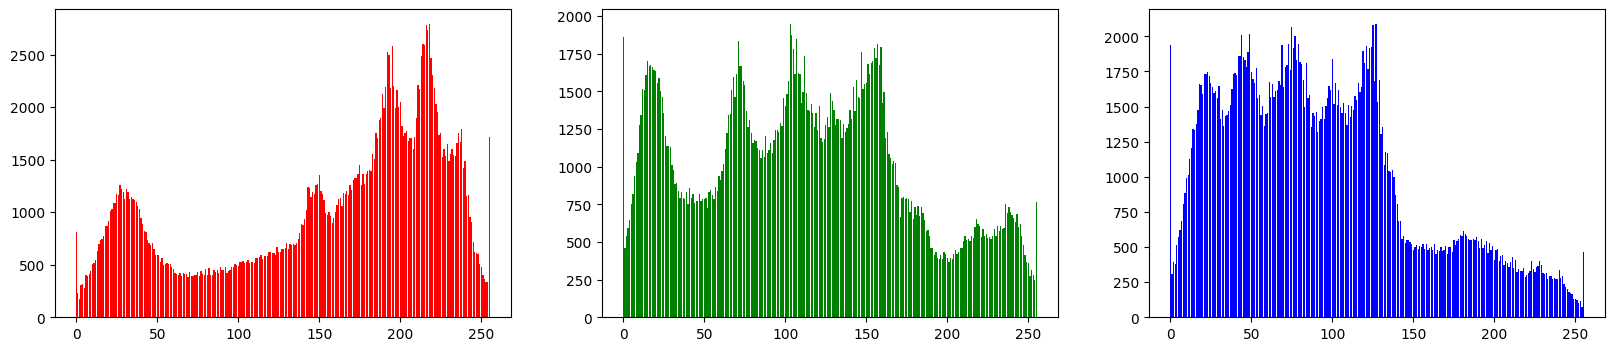

In [ ]:
# Input Image
img = io.imread('/content/drive/MyDrive/PCVK_MM/Images/Images/lena.jpg')

# hitung jumlah kemunculan setiap pixel warna pada seluruh pixel citra yang ada

# inisialisasi array histogram
hist_r = np.zeros(256, dtype=int)
hist_g = np.zeros(256, dtype=int)
hist_b = np.zeros(256, dtype=int)

# iterasi setiap pixel
for y in range(img.shape[0]):
  for x in range(img.shape[1]):
    # dapatkan nilai RGB
    r = img[y, x, 0]  # Red channel
    g = img[y, x, 1]  # Green channel
    b = img[y, x, 2]  # Blue channel

    hist_r[r] += 1
    hist_g[g] += 1
    hist_b[b] += 1

# tampilkan histogram
plt.figure(figsize=(20, 4))

plt.subplot(131)
plt.bar(range(256), hist_r, color='r')

plt.subplot(132)
plt.bar(range(256), hist_g, color='g')

plt.subplot(133)
plt.bar(range(256), hist_b, color='b')


plt.show()


4. Setelah mengerjakan soal no. 3, buatlah histogram citra yang sama akan tetapi
menggunakan library yang dimiliki oleh NumPy yaitu “histogram”. Bandingkan
hasilnya. Apakah output muncul sama? sama

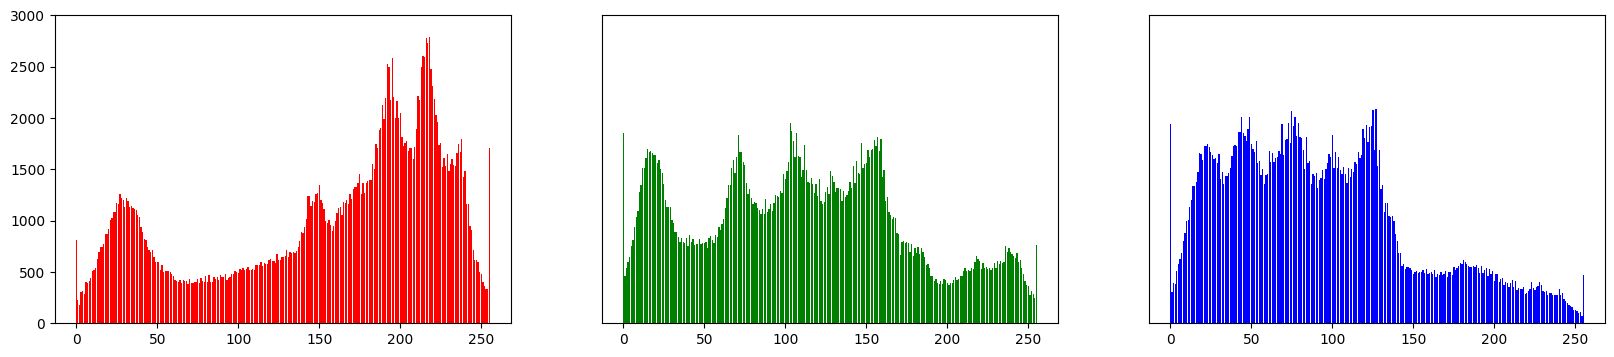

In [ ]:
# membuat histogram dengan numpy
hist_r = np.histogram(img[:,:,0], 256, [0, 256])[0]
hist_g = np.histogram(img[:,:,1], 256, [0, 256])[0]
hist_b = np.histogram(img[:,:,2], 256, [0, 256])[0]

# tampilkan histogram
plt.figure(figsize=(20, 4))

plt.subplot(131)
plt.bar(range(256), hist_r, color='r')
plt.ylim(0, 3000)

plt.subplot(132)
plt.bar(range(256), hist_g, color='g')
plt.ylim(0, 3000)
plt.yticks([])

plt.subplot(133)
plt.bar(range(256), hist_b, color='b')
plt.ylim(0, 3000)
plt.yticks([])

plt.show()

5. Buatlah histogram citra seperti output histogram equalization dan juga tampilan
gambar sebelum dan sesudah proses histogram equalization berikut berdasarkan
flowchart di bawah ini : (Gunakan gambar lena_lc.jpg)

In [ ]:
# Fungsi untuk menghitung histogram dari setiap channel gambar
def compute_histogram(image_channel):
    hist = np.zeros(256)
    for i in range(image_channel.shape[0]):
        for j in range(image_channel.shape[1]):
            hist[image_channel[i, j]] += 1
    return hist

# Fungsi untuk menghitung cumulative distribution function
def compute_cdf(hist):
    cdf = np.cumsum(hist)
    cdf_normalized = cdf / cdf[-1]
    return cdf_normalized

# Fungsi untuk melakukan histogram equalization pada setiap channel
def histogram_equalization(image_channel):
    hist = compute_histogram(image_channel)
    cdf = compute_cdf(hist)
    cdf_normalized = np.floor(255 * cdf).astype(np.uint8)

    equalized_channel = np.zeros_like(image_channel)
    for i in range(image_channel.shape[0]):
        for j in range(image_channel.shape[1]):
            equalized_channel[i, j] = cdf_normalized[image_channel[i, j]]

    return equalized_channel

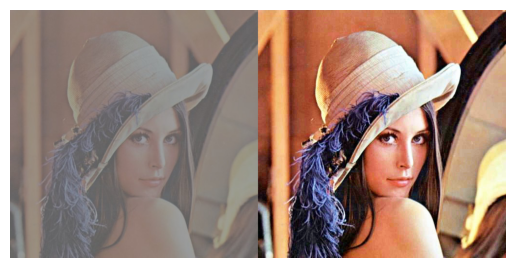

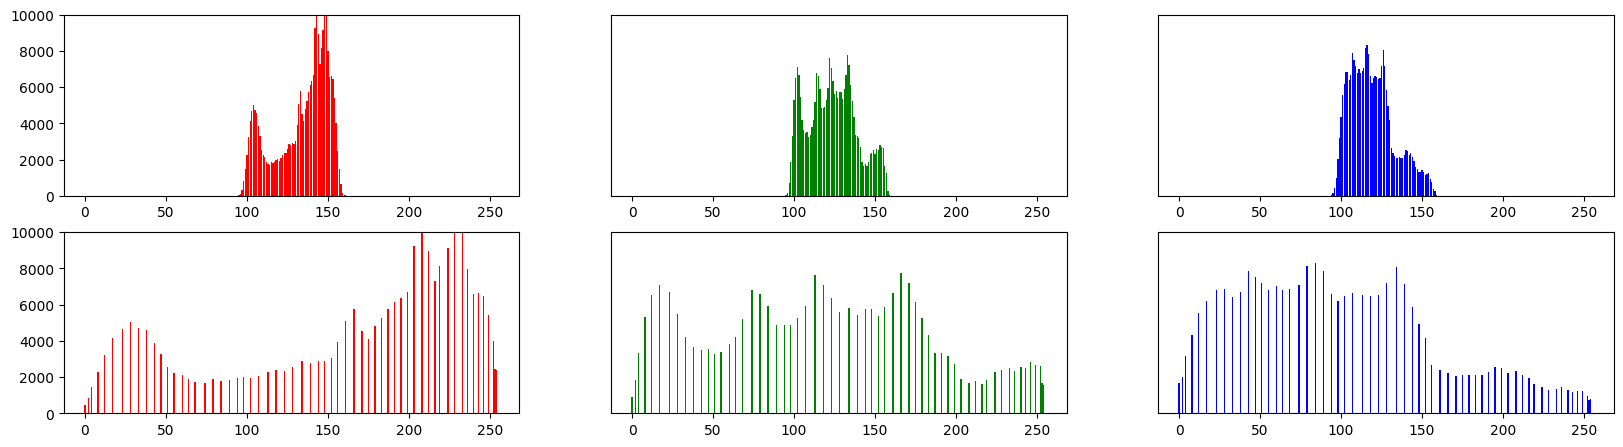

In [ ]:
lena_lc = io.imread('/content/drive/MyDrive/PCVK_MM/Images/Images/lena_lc.jpg')

lena_lc_hist = compute_histogram(lena_lc)

equalized_img = histogram_equalization(lena_lc)

final_frame = cv.hconcat([lena_lc, equalized_img])

plt.imshow(final_frame)
plt.axis('off')
plt.show()

# menampilkan histogram

R = lena_lc[:,:,0]
G = lena_lc[:,:,1]
B = lena_lc[:,:,2]

hist_r = compute_histogram(R)
hist_g = compute_histogram(G)
hist_b = compute_histogram(B)

channels = [hist_r, hist_g, hist_b]
colors = ['r', 'g', 'b']

plt.figure(figsize=(20, 8))

for i, channel in enumerate(channels):
    plt.subplot(3, 3, i+1)
    plt.bar(range(256), channel,color=colors[i])
    plt.ylim([0, 10000])
    if i != 0:
      plt.yticks([])

for i, channel in enumerate(channels):
    plt.subplot(3, 3, i+4)
    plt.bar(range(256), compute_histogram(equalized_img[:,:,i]),color=colors[i])
    plt.ylim([0, 10000])
    if i != 0:
      plt.yticks([])

plt.show()

6. Setelah mengerjakan soal no. 5, buatlah histogram citra yang sama akan tetapi
menggunakan library yang dimiliki oleh CV2 yaitu “equalizeHist”. Bandingkan
hasilnya. Apakah output muncul sama?

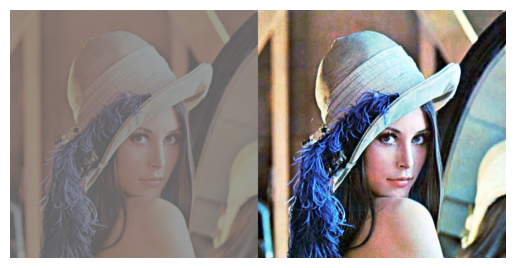

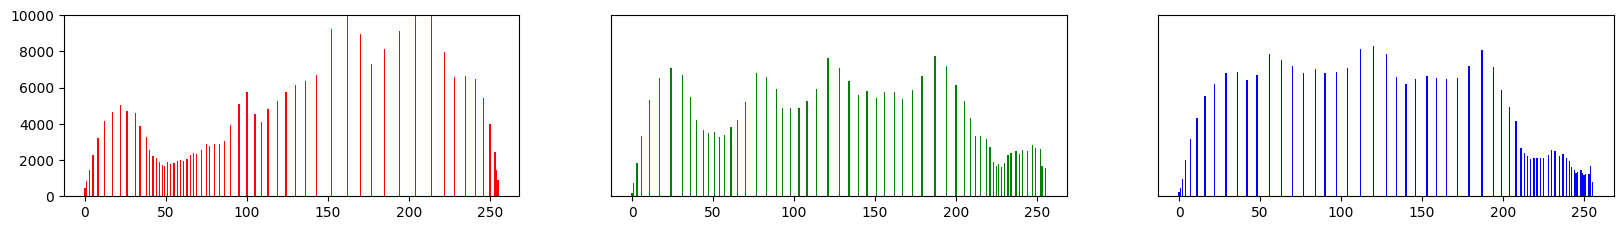

In [56]:
lena_lc = io.imread('/content/drive/MyDrive/PCVK_MM/Images/Images/lena_lc.jpg')

R = lena_lc[:,:,0]
G = lena_lc[:,:,1]
B = lena_lc[:,:,2]

hist_r = cv.equalizeHist(R)
hist_g = cv.equalizeHist(G)
hist_b = cv.equalizeHist(B)

merge = cv.merge([hist_r, hist_g, hist_b])

final_frame = cv.hconcat([lena_lc, merge])

plt.imshow(final_frame)
plt.axis('off')
plt.show()

channels = [hist_r,hist_g,hist_b]
colors = ['r', 'g', 'b']

plt.figure(figsize=(20, 8))

for i, channel in enumerate(channels):
    plt.subplot(3, 3, i+1)
    plt.bar(range(256), compute_histogram(channel),color=colors[i])
    plt.ylim([0, 10000])

    if i != 0:
      plt.yticks([])

plt.show()

Terdapat perbedaan hasil saat menggunakan fungsi OpenCV karena cv2.equalizeHist() hanya dapat bekerja pada satu channel (grayscale), sehingga perlu memisahkan dan memproses tiap channel RGB secara terpisah. proses ini menyebabkan distorsi warna karena tidak ada sinkronisasi antar channel. Pendekatan yang lebih baik adalah dengan menggunakan model warna YUV atau HSV dan melakukan histogram equalization hanya pada komponen kecerahan.

7. Lakukanlah proses pemetaan 16 juta warna RGB ke dalam 8 warna saja, yaitu hitam,
hijau, kuning, biru, cyan, magenta, putih seperti output berikut berdasarkan flowchart
di bawah ini! (Gunakan gambar lena.jpg)

8. Lakukanlah proses dithering Floyd and Steinberg seperti output berikut (tampilan image
awal, dan tampilan setelah dithering) berdasarkan flowchart di bagian bawah halaman
modul ini! (Gunakan gambar lena.jpg)

9. Menggunakan lena_lc.jpg rubah menjadi grey image, kemudian terapkan histogram
equalization sehingga terjadi perbaikan sebaran warna pada citra. Setelah itu dari hasil
histogram equalization implementasikan proses dithering Floyd and Steinberg sehingga
menampilkan gambar di bawah ini!